In [30]:
import numpy as np, scipy as sp
from pandas import read_csv
from matplotlib import pyplot

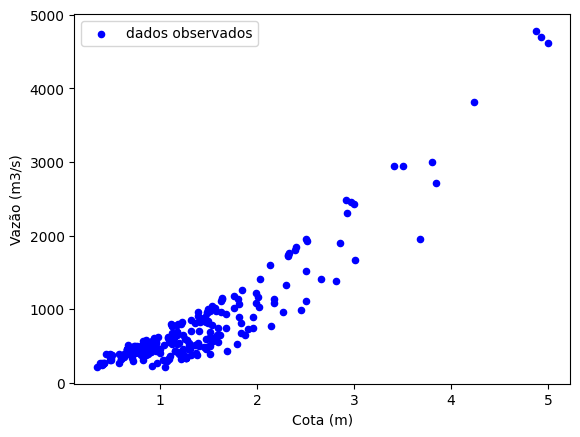

In [31]:
# Carregando os dados do arquivo CSV
# colunas COTA | VAZAO

dados_csv = read_csv('curva_chave-56994500.csv', delimiter=';', header=0, on_bad_lines='warn')

# passando a coluna \"COTA\" de centímetros para metros
dados_csv.loc[:,'Cota'] /= 100

# verificando a relação VAZÃO x COTA
dados_csv.plot.scatter(x='Cota', y='Vazao', color='blue', label='dados observados')
pyplot.xlabel("Cota (m)")
pyplot.ylabel("Vazão (m3/s)")
pyplot.legend()
pyplot.show()

x, y = dados_csv.Cota.to_numpy(), dados_csv.Vazao.to_numpy()


In [40]:
# Função Objetivo : Curva-Chave
# y = a * ((x - h0)^b)
def curva_chave(x, a, b):
	return a * np.power(x - h0, b)

In [41]:
h0 = 1
popt, _ = sp.optimize.curve_fit(curva_chave, x, y)

a, b = popt
print('y = %.5f * (x ^ %.5f)' % (a, b))

/tmp/ipykernel_6535/2089294588.py:4: RuntimeWarning: invalid value encountered in power
  return a * np.power(x - h0, b)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.